In [1]:
%load_ext autoreload
%autoreload 2

import numpy  as np
import pandas as pd
import h5py

from matplotlib import pyplot as plt

from common import hallmark as hm
from common import viz

In [2]:
pf = hm.ParaFrame('cache/Illinois_thermal_w5/{mag}a{aspin:g}_i{inc:d}/sed_Rh{Rhigh:d}.h5')

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

inc [50]
mag ['M']
aspin [0.]
Rhigh [10]


In [9]:
with h5py.File(pf.path.iloc[0]) as f:
    time = f['time'][:]
    nu   = f['nu'  ][:]
    knd  = f['knd' ][:]
    avg  = f['avg' ][:]
    err  = f['err' ][:]
    rlz  = f['len' ][:]

In [11]:
if not all(rlz == 16):
    print('WARNING: less than 16 realizations')

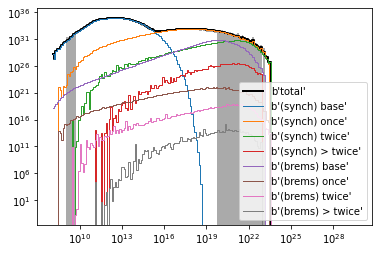

In [12]:
fig, ax = plt.subplots(1,1)

viz.step(ax, nu, np.mean(avg, axis=0), std=np.mean(err, axis=0), label=knd)

ax.legend()